In [1]:
!pip install emoji==1.7
import nltk
nltk.download('omw-1.4')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=d3a9762a4277308e836513138c6f30f7a1940510d6f8d7b1d050f8655acd6e72
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
#importing necessary libraries

!pip install text2emotion

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.5 MB/s eta 0:00:00


In [3]:
# imporitng the convertor
from sklearn.feature_extraction.text import TfidfVectorizer

# importing tabular data and matrices handlers
import pandas as pd
import numpy as np


# importing for calculations
from numpy import mean
from numpy import std

#importing to ignore warnings
import warnings
warnings.filterwarnings("ignore")

#importing for sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#importing classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#importing visualization packages
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

#text to emotion 
import text2emotion as te

#for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics

%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 100,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**Loading the dataset**

In [4]:
tweets_data = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis/Electiondataset.csv')

In [5]:
tweets_data.head()

,Datetime,Tweet Id,Text,Username
0,2023-01-21 22:55:28+00:00,1616932519760519168,He also urged the electorate in Khana to vote ...,gchahal
1,2023-01-21 21:51:43+00:00,1616916475591397377,...drugs tests are not required by Nigerian co...,gchahal
2,2023-01-21 10:30:54+00:00,1616745144585441283,The NPC held a one-day roundtable meeting with...,gchahal
3,2023-01-21 09:20:10+00:00,1616727344173178883,He described the reported endorsement as false...,gchahal
4,2023-01-21 00:06:02+00:00,1616587889865027589,The governor said the incident was designed by...,gchahal


**Data Cleaning and Preprocessing**

In [6]:
# removing URL, special characters, extra spaces, etc
tweets_data["Text"]=tweets_data.Text.str.replace(r'^b','') 
tweets_data["Text"]=tweets_data.Text.str.replace(r'https?:\/\/.*\/[a-zA-Z0-9]*', '') 
tweets_data["Text"]=tweets_data.Text.str.replace(r'@[a-zA-Z0-9]{1,10}', '') 

tweets_data["Text"]=tweets_data.Text.str.replace(r'\$[a-zA-Z0-9]*', '')
tweets_data["Text"]=tweets_data.Text.str.replace(r'[0-9]*','')

tweets_data["Text"]=tweets_data.Text.str.replace(r'\\[a-z A-Z]{1,2}','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\:','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\\n','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\#','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\/','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\'','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\"','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\-','')

tweets_data["Text"]=tweets_data.Text.str.replace(r'\?','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\_','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'%','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\,','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'.','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\&amp','')

tweets_data["Text"]=tweets_data.Text.str.replace(r';','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'!','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\\s','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\)','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\(','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\+','')
tweets_data["Text"]=tweets_data.Text.str.replace(r'\=','')

tweets_data['Text'] = tweets_data['Text'].str.strip().str.lower()

In [7]:
tweets_data.head()

,Datetime,Tweet Id,Text,Username
0,2023-01-21 22:55:28+00:00,1616932519760519168,he also urged the electorate in khana to vote ...,gchahal
1,2023-01-21 21:51:43+00:00,1616916475591397377,drugs tests are not required by nigerian const...,gchahal
2,2023-01-21 10:30:54+00:00,1616745144585441283,the npc held a oneday roundtable meeting with ...,gchahal
3,2023-01-21 09:20:10+00:00,1616727344173178883,he described the reported endorsement as false...,gchahal
4,2023-01-21 00:06:02+00:00,1616587889865027589,the governor said the incident was designed by...,gchahal


**Analyzing Sentiment Intensity**

In [8]:
#downloading vader_lexicon tool and initializing the sentiment analyzer
nltk.download("vader_lexicon")
sentiment_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [9]:
 #assigning polarities according to the text in tweets
tweets_data["Positive"] = [sentiment_analyzer.polarity_scores(itr)["pos"] for itr in tweets_data["Text"]]
tweets_data["Negative"] = [sentiment_analyzer.polarity_scores(itr)["neg"] for itr in tweets_data["Text"]]
tweets_data["Neutral"] = [sentiment_analyzer.polarity_scores(itr)["neu"] for itr in tweets_data["Text"]]
tweets_data['Compound'] = [sentiment_analyzer.polarity_scores(itr)["compound"] for itr in tweets_data["Text"]]

In [10]:
tweets_data.head()

,Datetime,Tweet Id,Text,Username,Positive,Negative,Neutral,Compound
0,2023-01-21 22:55:28+00:00,1616932519760519168,he also urged the electorate in khana to vote ...,gchahal,0.000,0.000,1.000,0.0000
1,2023-01-21 21:51:43+00:00,1616916475591397377,drugs tests are not required by nigerian const...,gchahal,0.137,0.000,0.863,0.4019
2,2023-01-21 10:30:54+00:00,1616745144585441283,the npc held a oneday roundtable meeting with ...,gchahal,0.083,0.000,0.917,0.4019
3,2023-01-21 09:20:10+00:00,1616727344173178883,he described the reported endorsement as false...,gchahal,0.055,0.034,0.911,0.2263
4,2023-01-21 00:06:02+00:00,1616587889865027589,the governor said the incident was designed by...,gchahal,0.122,0.138,0.740,-0.1531


In [11]:
compound_values = tweets_data["Compound"].values

In [12]:
 #setting sentiments according to the compound polarity
sentiment_list=[]
for i in compound_values:
    if i >= 0.05 :
        sentiment_list.append('Positive')
    elif i <= -0.05 :
        sentiment_list.append('Negative')
    else:
        sentiment_list.append('Neutral')

In [13]:
# getting unique values of sentiments
list_set = set(sentiment_list)
sentiment_list_unique = (list(list_set))

In [14]:
# adding the sentiments to our initial dataframe
tweets_data["Sentiment"] = sentiment_list
tweets_data.head()

,Datetime,Tweet Id,Text,Username,Positive,Negative,Neutral,Compound,Sentiment
0,2023-01-21 22:55:28+00:00,1616932519760519168,he also urged the electorate in khana to vote ...,gchahal,0.000,0.000,1.000,0.0000,Neutral
1,2023-01-21 21:51:43+00:00,1616916475591397377,drugs tests are not required by nigerian const...,gchahal,0.137,0.000,0.863,0.4019,Positive
2,2023-01-21 10:30:54+00:00,1616745144585441283,the npc held a oneday roundtable meeting with ...,gchahal,0.083,0.000,0.917,0.4019,Positive
3,2023-01-21 09:20:10+00:00,1616727344173178883,he described the reported endorsement as false...,gchahal,0.055,0.034,0.911,0.2263,Positive
4,2023-01-21 00:06:02+00:00,1616587889865027589,the governor said the incident was designed by...,gchahal,0.122,0.138,0.740,-0.1531,Negative


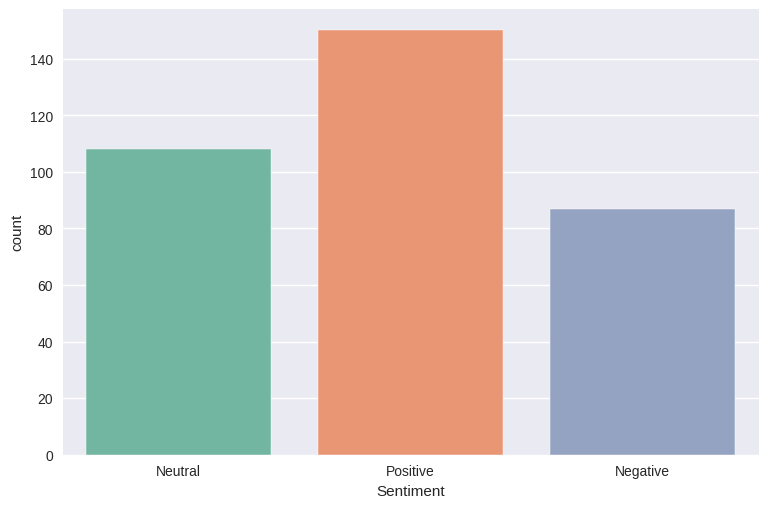

In [15]:
 #visualizing the count of each sentiment
plt.style.use("seaborn")
fig, axes = plt.subplots()
bp = sns.countplot(x="Sentiment", data=tweets_data, palette="Set2")
plt.show()

In [16]:
tweets_data.shape

(345, 9)

# Emotion Detection

In [17]:
# copying the sentiment data into a new dataframe
emotion_data = tweets_data


In [18]:
# analyzing the emotions of tweets and adding them to the dataframe
emotion_data["Emotion"] = [te.get_emotion(iterator) for iterator in emotion_data['Text']]

In [19]:
emotion_data.head()

,Datetime,Tweet Id,Text,Username,Positive,Negative,Neutral,Compound,Sentiment,Emotion
0,2023-01-21 22:55:28+00:00,1616932519760519168,he also urged the electorate in khana to vote ...,gchahal,0.000,0.000,1.000,0.0000,Neutral,"{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
1,2023-01-21 21:51:43+00:00,1616916475591397377,drugs tests are not required by nigerian const...,gchahal,0.137,0.000,0.863,0.4019,Positive,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ..."
2,2023-01-21 10:30:54+00:00,1616745144585441283,the npc held a oneday roundtable meeting with ...,gchahal,0.083,0.000,0.917,0.4019,Positive,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
3,2023-01-21 09:20:10+00:00,1616727344173178883,he described the reported endorsement as false...,gchahal,0.055,0.034,0.911,0.2263,Positive,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
4,2023-01-21 00:06:02+00:00,1616587889865027589,the governor said the incident was designed by...,gchahal,0.122,0.138,0.740,-0.1531,Negative,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.75,..."


In [20]:
# analyzing the weight of each emotion for each tweet
emotion_dataframe = pd.DataFrame(emotion_data["Emotion"].values.tolist(), index=emotion_data.index)
emotion_dataframe

,Happy,Angry,Surprise,Sad,Fear
0,1.0,0.0,0.00,0.00,0.00
1,0.0,0.0,0.50,0.00,0.50
2,0.0,0.0,0.00,1.00,0.00
3,0.0,0.0,0.00,0.25,0.75
4,0.0,0.0,0.75,0.25,0.00
...,...,...,...,...,...
340,0.0,0.0,0.00,0.00,1.00
341,0.0,0.0,0.00,1.00,0.00
342,1.0,0.0,0.00,0.00,0.00
343,0.0,0.0,1.00,0.00,0.00


In [21]:
# adding new emotions to our original dataframe and dropping the sentiments
emotion_data["Happy"] = emotion_dataframe["Happy"]
emotion_data.drop('Emotion', axis=1, inplace=True)
emotion_data.drop(['Positive','Negative', 'Neutral', 'Compound'], axis=1, inplace=True)

In [22]:
emotion_data.head()

,Datetime,Tweet Id,Text,Username,Sentiment,Happy
0,2023-01-21 22:55:28+00:00,1616932519760519168,he also urged the electorate in khana to vote ...,gchahal,Neutral,1.0
1,2023-01-21 21:51:43+00:00,1616916475591397377,drugs tests are not required by nigerian const...,gchahal,Positive,0.0
2,2023-01-21 10:30:54+00:00,1616745144585441283,the npc held a oneday roundtable meeting with ...,gchahal,Positive,0.0
3,2023-01-21 09:20:10+00:00,1616727344173178883,he described the reported endorsement as false...,gchahal,Positive,0.0
4,2023-01-21 00:06:02+00:00,1616587889865027589,the governor said the incident was designed by...,gchahal,Negative,0.0


In [23]:
# adding the rest of the emotions
emotion_data["Angry"] = emotion_dataframe["Angry"]
emotion_data["Surprise"] = emotion_dataframe["Surprise"]
emotion_data["Sad"] = emotion_dataframe["Sad"]
emotion_data["Fear"] = emotion_dataframe["Fear"]

In [24]:
emotion_data.head()

,Datetime,Tweet Id,Text,Username,Sentiment,Happy,Angry,Surprise,Sad,Fear
0,2023-01-21 22:55:28+00:00,1616932519760519168,he also urged the electorate in khana to vote ...,gchahal,Neutral,1.0,0.0,0.00,0.00,0.00
1,2023-01-21 21:51:43+00:00,1616916475591397377,drugs tests are not required by nigerian const...,gchahal,Positive,0.0,0.0,0.50,0.00,0.50
2,2023-01-21 10:30:54+00:00,1616745144585441283,the npc held a oneday roundtable meeting with ...,gchahal,Positive,0.0,0.0,0.00,1.00,0.00
3,2023-01-21 09:20:10+00:00,1616727344173178883,he described the reported endorsement as false...,gchahal,Positive,0.0,0.0,0.00,0.25,0.75
4,2023-01-21 00:06:02+00:00,1616587889865027589,the governor said the incident was designed by...,gchahal,Negative,0.0,0.0,0.75,0.25,0.00


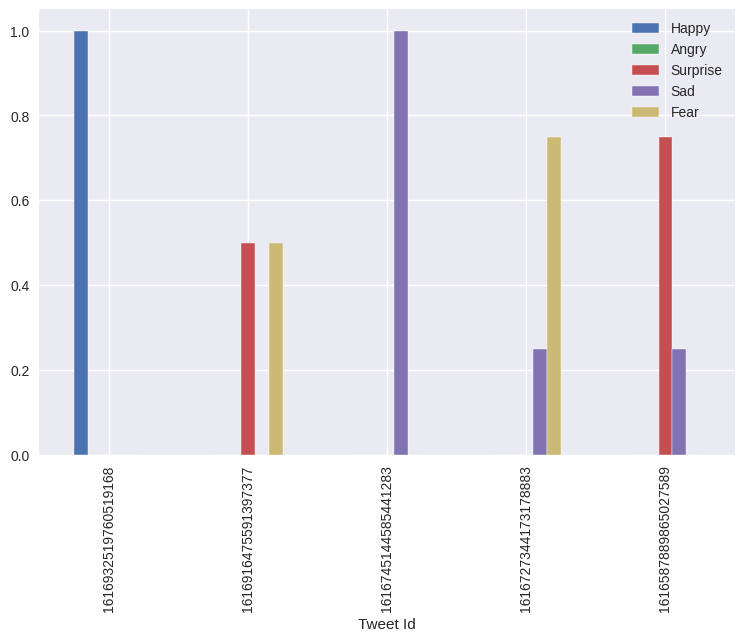

In [25]:
# visualizing the emotion dataframe
emotion_data[:5].plot(x="Tweet Id", y=["Happy", "Angry","Surprise","Sad","Fear"], kind="bar")
plt.show()


In [26]:
# deciding the emotion of each tweet by selecting emotion with maximum weight
emotion_data['Emotion'] = emotion_data[["Happy", "Angry","Surprise","Sad","Fear"]].idxmax(axis=1)

In [27]:
emotion_data.head()

,Datetime,Tweet Id,Text,Username,Sentiment,Happy,Angry,Surprise,Sad,Fear,Emotion
0,2023-01-21 22:55:28+00:00,1616932519760519168,he also urged the electorate in khana to vote ...,gchahal,Neutral,1.0,0.0,0.00,0.00,0.00,Happy
1,2023-01-21 21:51:43+00:00,1616916475591397377,drugs tests are not required by nigerian const...,gchahal,Positive,0.0,0.0,0.50,0.00,0.50,Surprise
2,2023-01-21 10:30:54+00:00,1616745144585441283,the npc held a oneday roundtable meeting with ...,gchahal,Positive,0.0,0.0,0.00,1.00,0.00,Sad
3,2023-01-21 09:20:10+00:00,1616727344173178883,he described the reported endorsement as false...,gchahal,Positive,0.0,0.0,0.00,0.25,0.75,Fear
4,2023-01-21 00:06:02+00:00,1616587889865027589,the governor said the incident was designed by...,gchahal,Negative,0.0,0.0,0.75,0.25,0.00,Surprise


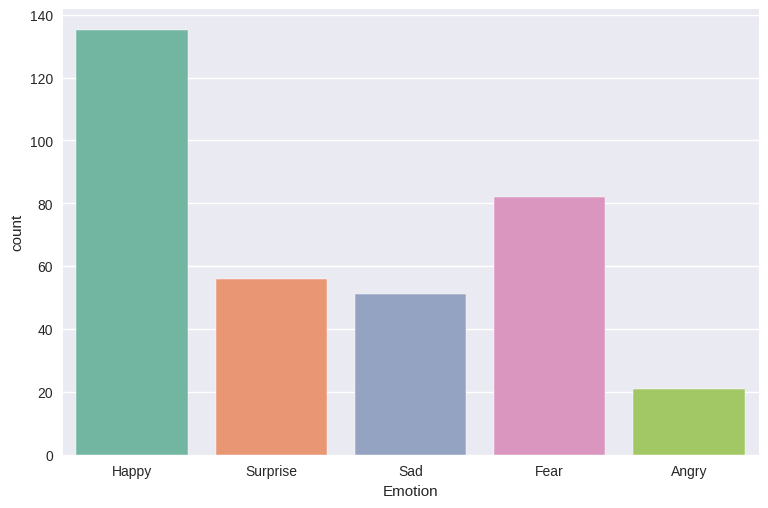

In [28]:
# visualizing the count of each emotion
bp = sns.countplot(x="Emotion", data=emotion_data, palette="Set2")
plt.show()

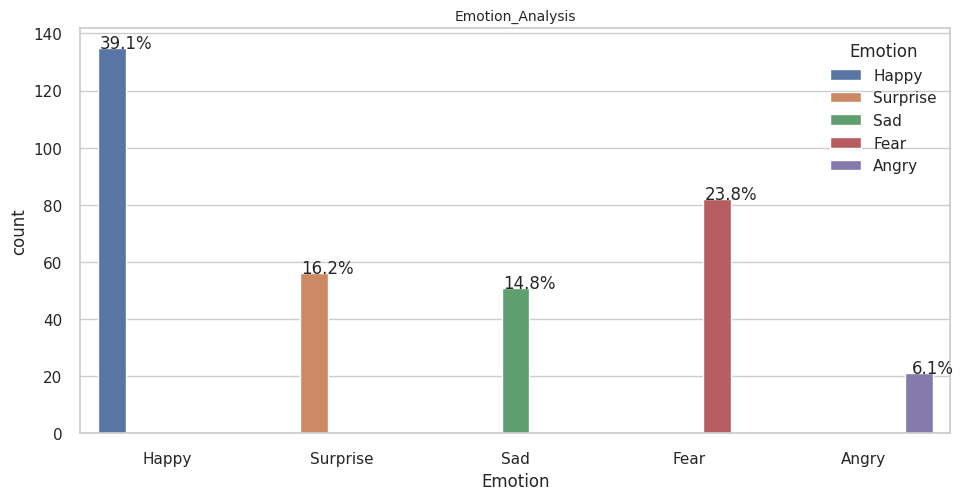

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(emotion_data))
ax = sns.countplot(x="Emotion", hue="Emotion", data=emotion_data)
plt.title('Emotion_Analysis', fontsize=10)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [30]:
# analyzing the corelation between our emotions and tweets
emotion_data.corr()

,Tweet Id,Happy,Angry,Surprise,Sad,Fear
Tweet Id,1.000000,-0.015235,0.014664,-0.009262,0.062100,0.079673
Happy,-0.015235,1.000000,-0.075286,-0.130480,-0.163218,-0.155098
Angry,0.014664,-0.075286,1.000000,-0.105469,-0.071051,-0.056879
Surprise,-0.009262,-0.130480,-0.105469,1.000000,-0.115570,-0.248208
Sad,0.062100,-0.163218,-0.071051,-0.115570,1.000000,-0.243795
Fear,0.079673,-0.155098,-0.056879,-0.248208,-0.243795,1.000000


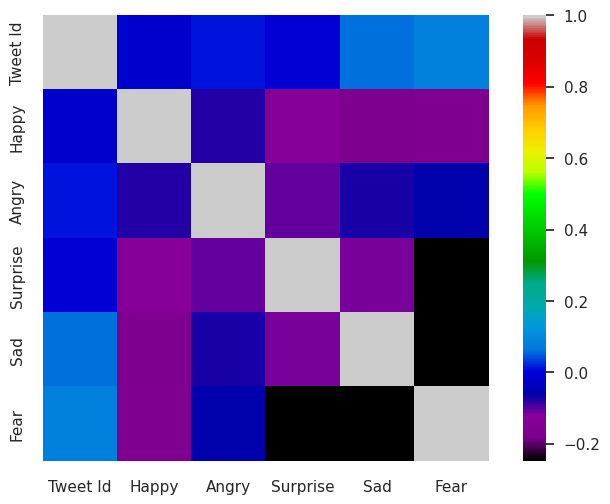

In [31]:
# visualizing the corelation matrix
sns.heatmap(emotion_data.corr(), square=True, cmap='nipy_spectral')
plt.show()